In [114]:
import pandas as pd 
import numpy as np

### Data Analysis Before Building the graph

In [115]:
data = pd.read_csv("src/airways.csv" ,index_col=0)
data.head()

,route,id,navaid,latitude,longitude
0,A1,1,HCE,33.114350,139.788483
1,A1,2,KARTA,33.193211,138.972397
2,A1,3,KEC,33.447742,135.794494
3,A1,4,ALBAT,33.364503,135.441514
4,A1,5,HALON,33.248769,134.997222


In [116]:
data['navaid'].duplicated().sum()

60139

In [117]:
data['navaid'].unique()

array(['HCE', 'KARTA', 'KEC', ..., 'RATMO', 'NISGA', 'GODUR'],
      dtype=object)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102204 entries, 0 to 102203
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   route      102204 non-null  object 
 1   id         102204 non-null  int64  
 2   navaid     102167 non-null  object 
 3   latitude   102204 non-null  float64
 4   longitude  102204 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.7+ MB


In [119]:

india_min_longitude = 68.17  
india_max_longitude = 97.25  
india_min_latitude = 6.4 
india_max_latitude = 35.4

def filter_india(df):
  return df[(df['longitude'] >= india_min_longitude) & 
            (df['longitude'] <= india_max_longitude) & 
            (df['latitude'] >= india_min_latitude) & 
            (df['latitude'] <= india_max_latitude)]

In [120]:
india = filter_india(data)

In [121]:
india['navaid'].duplicated().sum()

1664

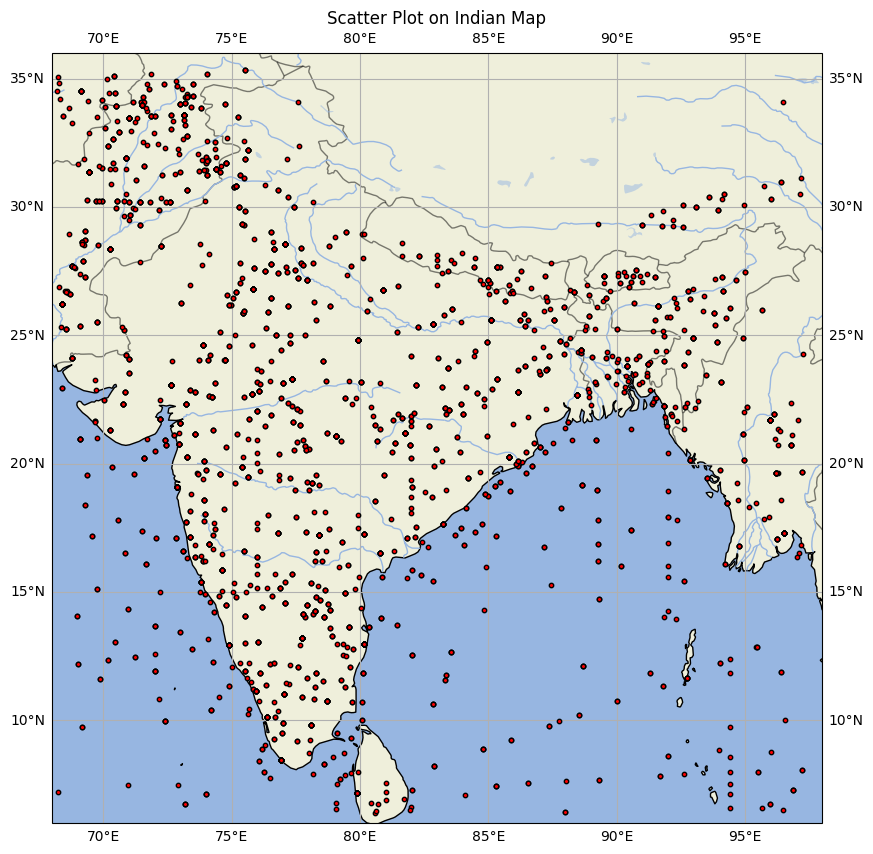

In [122]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Example latitude and longitude data
latitudes = india['latitude'].values
longitudes = india['longitude'].values

# Create a figure and an axes object with the specified projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add Indian boundaries and states
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_extent([68, 98, 6, 36], crs=ccrs.PlateCarree())

# Scatter plot on the map
ax.scatter(longitudes, latitudes, color='red', s=10, edgecolor='k', zorder=5)
# Add gridlines for better readability
ax.gridlines(draw_labels=True)

# Add title
plt.title('Scatter Plot on Indian Map')

# Show the plot
plt.show()


In [123]:
india.route.nunique()

482

In [124]:
i = india.set_index('route'  )
i

,id,navaid,latitude,longitude
route,,,,
A201,1,LKN,26.758556,80.894417
A201,2,BODOG,26.026944,83.581944
A201,3,PPT,25.590417,85.089917
A201,4,MONDA,25.350556,86.437778
A201,5,BIKIK,24.779722,87.797500
...,...,...,...,...
Z307,8,SAROJ,28.551944,69.185000
Z307,9,MATBA,30.251944,69.828333
Z307,10,TEMAV,31.483333,70.258056


In [125]:
i.loc['A201']

,id,navaid,latitude,longitude
route,,,,
A201,1,LKN,26.758556,80.894417
A201,2,BODOG,26.026944,83.581944
A201,3,PPT,25.590417,85.089917
A201,4,MONDA,25.350556,86.437778
A201,5,BIKIK,24.779722,87.797500
A201,6,TEBID,24.683889,88.030556
A201,7,RAJ,24.439217,88.615028
A201,8,BOGEP,24.068889,90.413889
A201,9,AAT,23.889231,91.239425


In [126]:
i.index.unique().values
    

array(['A201', 'A201B', 'A325', 'A347', 'A453', 'A454', 'A455', 'A456',
       'A462', 'A465', 'A466', 'A467', 'A472', 'A474', 'A581', 'A589',
       'A599', 'A791', 'B209', 'B210', 'B211', 'B213', 'B342', 'B345',
       'B459', 'B463', 'B465', 'B466', 'B593', 'FR1', 'FR2', 'FR3', 'FR4',
       'FR5', 'G201', 'G202', 'G206', 'G208', 'G210', 'G214', 'G325',
       'G326', 'G333', 'G335', 'G336', 'G348', 'G450', 'G451', 'G452',
       'G454', 'G463', 'G465', 'G472', 'G473', 'G590', 'G598', 'G668',
       'G796', 'J1', 'J10', 'J11', 'J111', 'J112', 'J113', 'J115', 'J116',
       'J118', 'J119', 'J12', 'J121', 'J122', 'J124', 'J125', 'J126',
       'J129', 'J13', 'J130', 'J131', 'J132', 'J133', 'J134', 'J137',
       'J138', 'J139', 'J14', 'J140', 'J141', 'J142', 'J143', 'J144',
       'J145', 'J147', 'J148', 'J149', 'J15', 'J150', 'J151', 'J153',
       'J156', 'J16', 'J164', 'J165', 'J166', 'J17', 'J173', 'J174',
       'J176', 'J178', 'J179', 'J18', 'J180', 'J181', 'J184', 'J186',
     

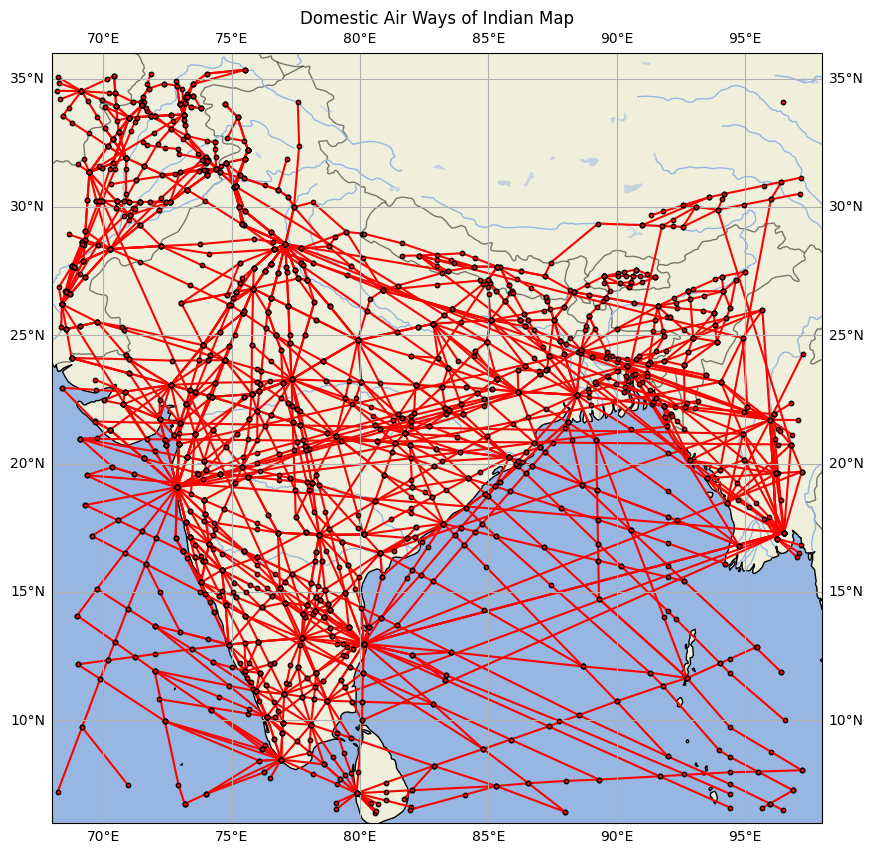

In [127]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure and an axes object with the specified projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add Indian boundaries and states
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_extent([68, 98, 6, 36], crs=ccrs.PlateCarree())

# Scatter plot on the map
# Example latitude and longitude data
for route in i.index.unique().values:
    try : 
        latitudes = i.loc[route]['latitude'].values 
        longitudes = i.loc[route]['longitude'].values
    except : 
        latitudes =  [i.loc[route]['latitude']]
        longitudes = [i.loc[route]['longitude']]
    ax.scatter(longitudes, latitudes, color='red', s=10, edgecolor='k', zorder=5)
    ax.plot(longitudes, latitudes, color='red')

# Add gridlines for better readability
ax.gridlines(draw_labels=True)

# Add title
plt.title('Domestic Air Ways of Indian Map')
plt.savefig("DomesticAirWays.png")
# Show the plot
plt.show()


## Points to take away 

* There are air routes with only one navigational ids (single node leading to no where)
* There are navigational ids which are geographically very close to each other and can be considered as one node if needed 

### Drop routes with only one id and no intersection 

In [128]:
navaid_counts = i['navaid'].value_counts()
has_single_occurrence = navaid_counts == 1

# Create a new column based on the counts
i['has_one_occurrence'] = i['navaid'].apply(lambda x: has_single_occurrence[x])


In [129]:
routes_to_drop = [] # drop routes with only one id and no intersection 
for route in i.index.unique().values : 
    if isinstance(i.loc[route] , pd.Series) and i.loc[route].has_one_occurrence : 
        routes_to_drop.append(route)
print(routes_to_drop)

['L888']


In [130]:
routes = i.drop(index=routes_to_drop)

In [131]:
routes

,id,navaid,latitude,longitude,has_one_occurrence
route,,,,,
A201,1,LKN,26.758556,80.894417,False
A201,2,BODOG,26.026944,83.581944,False
A201,3,PPT,25.590417,85.089917,False
A201,4,MONDA,25.350556,86.437778,False
A201,5,BIKIK,24.779722,87.797500,False
...,...,...,...,...,...
Z307,8,SAROJ,28.551944,69.185000,True
Z307,9,MATBA,30.251944,69.828333,False
Z307,10,TEMAV,31.483333,70.258056,True


## Build Graph 

In [133]:
routes

,id,navaid,latitude,longitude,has_one_occurrence
route,,,,,
A201,1,LKN,26.758556,80.894417,False
A201,2,BODOG,26.026944,83.581944,False
A201,3,PPT,25.590417,85.089917,False
A201,4,MONDA,25.350556,86.437778,False
A201,5,BIKIK,24.779722,87.797500,False
...,...,...,...,...,...
Z307,8,SAROJ,28.551944,69.185000,True
Z307,9,MATBA,30.251944,69.828333,False
Z307,10,TEMAV,31.483333,70.258056,True


In [134]:
routes.index.values

array(['A201', 'A201', 'A201', ..., 'Z307', 'Z307', 'Z307'], dtype=object)

In [135]:
routes['route'] = routes.index.values

In [136]:
routes_count = routes['route'].value_counts()
has_single_occurrence = routes_count == 1


In [137]:
has_single_occurrence

route
G472    False
P628    False
N895    False
G463    False
L759    False
        ...  
N636     True
N894     True
P518     True
P757     True
V16      True
Name: count, Length: 481, dtype: bool

In [138]:
routes['has_one_route_occurrence'] = routes['route'].apply(lambda x: has_single_occurrence[x])


In [139]:
routes = routes[routes['has_one_route_occurrence']==False]

In [140]:
edge_list = []

for route in routes.index.unique().values:
    edge = [] 
    for node in routes.loc[route].iterrows():
        edge.append(node[1].navaid)
        # print(edge)
        if len(edge) == 2 :
            edge_list.append(edge.copy())
            del edge[0]
print(f'Number of edges in graph : {len(edge_list)}')

Number of edges in graph : 2163


In [141]:
def create_adjacency_graph(edge_list):
  """
  Creates an adjacency graph represented as a dictionary of sets from an edge list.

  Args:
      edge_list: A list of tuples where each tuple represents an edge (source, destination).

  Returns:
      A dictionary where keys are nodes and values are sets of their connected nodes.
  """
  graph = {}
  for source, destination in edge_list:
    if source not in graph:
      graph[source] = set()
    graph[source].add(destination)

    if destination not in graph:
      graph[destination] = set()
    graph[destination].add(source)  
  return graph


In [142]:
graph = create_adjacency_graph(edge_list=edge_list)

In [143]:
len(graph)

980

In [144]:
navigationalId_map = {}

for route in routes.values: 
    if route[1] not in navigationalId_map : 
        navigationalId_map[route[1]] = (route[2] , route[3])

print(navigationalId_map)

{'LKN': (26.758556, 80.894417), 'BODOG': (26.026944, 83.581944), 'PPT': (25.590417, 85.089917), 'MONDA': (25.350556, 86.437778), 'BIKIK': (24.779722, 87.7975), 'TEBID': (24.683889, 88.030556), 'RAJ': (24.439217, 88.615028), 'BOGEP': (24.068889, 90.413889), 'AAT': (23.889231, 91.239425), 'ANSOS': (23.450833, 93.463333), 'PRA': (24.037222, 74.743889), 'INTIX': (24.2175, 74.156389), 'TASOP': (25.222222, 70.799722), 'KE': (25.520092, 69.770906), 'POTUP': (25.367222, 69.099722), 'DOVDO': (25.242778, 68.564167), 'BBB': (19.086169, 72.874703), 'ISRIS': (20.757972, 72.946303), 'APANO': (21.583889, 72.982778), 'QQZ': (22.332972, 73.225056), 'AMVIG': (22.853611, 73.375833), 'ARADO': (24.026667, 73.719722), 'UUD': (24.612842, 73.894111), 'UKBAB': (26.196389, 74.912778), 'DIPAS': (27.6375, 75.864167), 'CHI': (28.35, 76.658889), 'DPN': (28.566917, 77.093528), 'PATOX': (33.548333, 68.42), 'NOLEX': (33.867778, 68.66), 'TAPIS': (34.516667, 69.15), 'PEGTO': (34.447222, 70.211111), 'RAMSO': (34.43, 70.4

In [145]:
import heapq
from math import radians, sin, cos, acos, sqrt

def a_star_search(graph, source, destination, max_paths=3):
  """
  Performs A* search to find the best (shortest hop count) paths between source and destination.

  Args:
      graph: Adjacency graph represented as a dictionary of sets.
      source: Starting node of the search.
      destination: Destination node of the search.
      max_paths: Maximum number of paths to return (default: 3).

  Returns:
      A list containing the best max_paths paths (in terms of hop count) or an empty list if no path is found.
  """

  # Priority queue for storing frontier nodes (ordered by f-score)
  frontier = [(0, source, [])]  # (f-score, current node, path to reach current node)

  # Set to store visited nodes
  visited = set()
  results = [] 
  while frontier:
    # Get the node with the lowest f-score from the frontier
    f_score, current_node, path = heapq.heappop(frontier)

    # If the destination is reached, add the path to results and potentially stop
    if current_node == destination:
      results.append(path)
      if len(results) == max_paths:
        return results

    # Mark current node as visited
    visited.add(current_node)

    # Explore neighbors
    for neighbor in graph[current_node]:
      if neighbor not in visited:
        # Calculate g-score (hop count) for the neighbor
        g_score = len(path) + 1

        # Heuristic function (assuming distance to destination is known for each node)
        h_score = 0 # haversine_heuristic(navigationalId_map[source],navigationalId_map[neighbor], navigationalId_map[destination])

        # Calculate f-score (g_score + h_score)
        total_f_score = g_score + h_score

        # Add neighbor to the frontier with its f-score, path, and g-score
        heapq.heappush(frontier, (total_f_score, neighbor, path + [current_node]))

  return results  # No path found


def haversine_heuristic(source_coords, neighbor_coords, destination_coords, earth_radius=6371):  # Earth radius in kilometers
  """
  Calculates the estimated distance (as the crow flies) between two points using the Haversine formula.

  Args:
      source_coords: Tuple containing latitude and longitude of the source node.
      neighbor_coords: Tuple containing latitude and longitude of the neighbor node.
      destination_coords: Tuple containing latitude and longitude of the destination node.
      earth_radius: Optional earth radius in kilometers (default: 6371).

  Returns:
      Estimated distance between the neighbor and the destination in kilometers.
  """

  # Convert coordinates to radians
  source_lat, source_lon = radians(source_coords[0]), radians(source_coords[1])
  neighbor_lat, neighbor_lon = radians(neighbor_coords[0]), radians(neighbor_coords[1])
  destination_lat, destination_lon = radians(destination_coords[0]), radians(destination_coords[1])

  # Calculate the angle differences
  d_lat = destination_lat - neighbor_lat
  d_lon = destination_lon - neighbor_lon
  # Calculate the Haversine formula terms
  a = sin(d_lat / 2) * sin(d_lat / 2) + cos(neighbor_lat) * cos(destination_lat) * sin(d_lon / 2) * sin(d_lon / 2)
  c = 2 * acos(sqrt(a))

  # Calculate the estimated distance using the earth radius
  distance = earth_radius * c

  return distance

In [146]:
a_star_search(graph , 'GGC' , 'BOGEP', 6)

[['GGC', 'PPT', 'MONDA', 'BIKIK', 'TEBID', 'RAJ'],
 ['GGC', 'PPT', 'SEGMO', 'GOSBI', 'AVNAK', 'RAJ'],
 ['GGC', 'RRC', 'JJS', 'CEA', 'AGODA', 'RAJ'],
 ['GGC', 'TEPAL', 'OPESU', 'CEA', 'AGODA', 'RAJ']]

In [147]:
def plot_paths(src , des ,npaths=3):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Add Indian boundaries and states
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.set_extent([68, 98, 6, 36], crs=ccrs.PlateCarree())

    # Scatter plot on the map
    # Example latitude and longitude data
    routes = a_star_search(graph , src , des , max_paths=npaths) 
    print()
    for route in routes:
        try : 
            latitudes = [navigationalId_map[node][0] for node in route]  
            longitudes = [navigationalId_map[node][1] for node in route]  
        except Exception as e:
            print(e) 
            # latitudes =  [i.loc[route]['latitude']]
            # longitudes = [i.loc[route]['longitude']]
        ax.scatter(longitudes, latitudes, color='red', s=10, edgecolor='k', zorder=5)
        ax.plot(longitudes, latitudes, color='red')

    # Add gridlines for better readability
    ax.gridlines(draw_labels=True)

    # Add title
    plt.title('Domestic Air Ways of Indian Map')
    # plt.savefig("DomesticAirWays.png")
    # Show the plot
    plt.show()

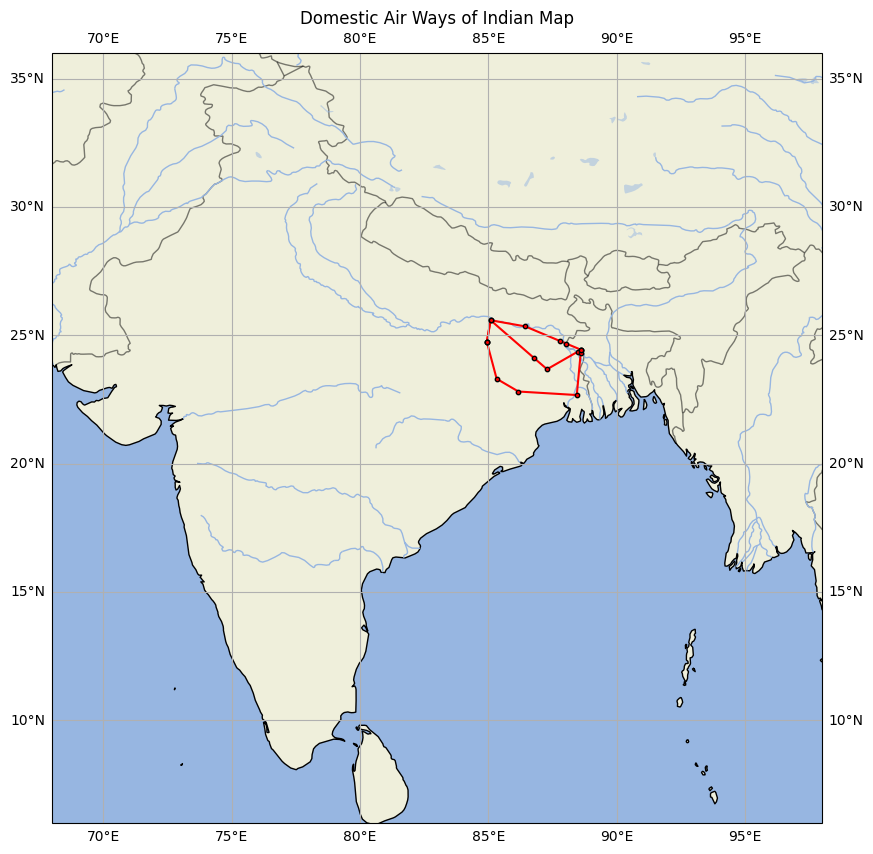

In [148]:
plot_paths('GGC' , 'BOGEP' ) 

In [149]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    
    # Differences in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Distance in kilometers
    distance = R * c
    return distance

def find_nearest_position(target_lat, target_lon, positions_dict):
    nearest_key = None
    nearest_distance = float('inf')
    
    for key, (lat, lon) in positions_dict.items():
        distance = haversine_distance(target_lat, target_lon, lat, lon)
        if distance < nearest_distance:
            nearest_distance = distance
            nearest_key = key
    
    return positions_dict[nearest_key] , nearest_key

In [150]:

from math import radians, sin, cos, sqrt , asin
def distance(lat1, lon1, lat2, lon2):
  """
  Calculates the distance between two points using the Haversine formula.
  """
  p = radians(180)  # Factor for converting degrees to radians
  dlat = radians(lat2 - lat1)
  dlon = radians(lon2 - lon1)
  a = sin(dlat/2) * sin(dlat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2) * sin(dlon/2)
  c = 2 * asin(sqrt(a))  # Haversine formula
  # Earth's radius (adjust if needed for higher precision)
  radius = 6371  # kilometers

  return c * radius

def find_nearest_lat_lon(data, target_lat, target_lon):
  """
  Finds the nearest latitude and longitude in the dictionary to the target coordinates.
  """
  nearest_key = None
  min_distance = float('inf')
  for key, (lat, lon) in data.items():
    dist = distance(target_lat, target_lon, lat, lon)
    if dist < min_distance:
      min_distance = dist
      nearest_key = key
  return data[nearest_key] , nearest_key

In [151]:
target_lat = 13 # Chennai
target_lon = 18

nearest , navaid = find_nearest_position( target_lat, target_lon ,navigationalId_map)

print("Nearest location:", nearest )
print("Place: "  ,navaid)

Nearest location: (22.957778, 68.378056)
Place:  GUREV


In [152]:
arget_lat = 19 # Mumbai 
target_lon = 72

nearest , navaid = find_nearest_position( target_lat, target_lon ,navigationalId_map)

print("Nearest location:", nearest )
print("Place: "  ,navaid)

Nearest location: (12.583333, 71.999444)
Place:  BEDIL


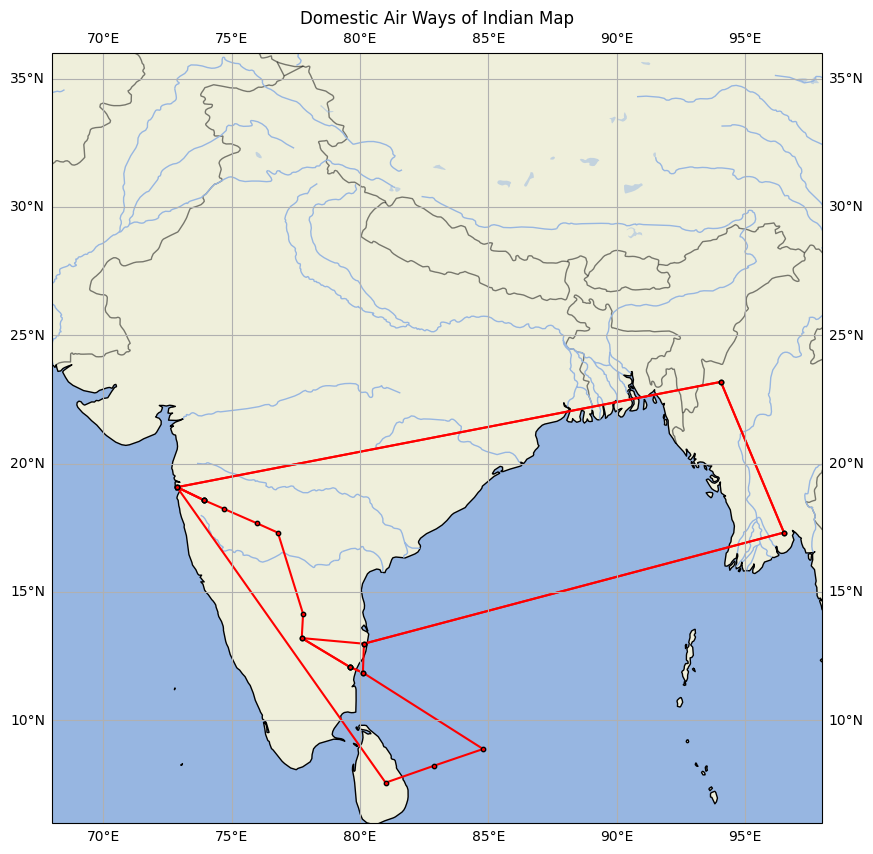

In [153]:
plot_paths("LEKAP" , "DOGAP" ,10)

In [154]:
navigationalId_map

{'LKN': (26.758556, 80.894417),
 'BODOG': (26.026944, 83.581944),
 'PPT': (25.590417, 85.089917),
 'MONDA': (25.350556, 86.437778),
 'BIKIK': (24.779722, 87.7975),
 'TEBID': (24.683889, 88.030556),
 'RAJ': (24.439217, 88.615028),
 'BOGEP': (24.068889, 90.413889),
 'AAT': (23.889231, 91.239425),
 'ANSOS': (23.450833, 93.463333),
 'PRA': (24.037222, 74.743889),
 'INTIX': (24.2175, 74.156389),
 'TASOP': (25.222222, 70.799722),
 'KE': (25.520092, 69.770906),
 'POTUP': (25.367222, 69.099722),
 'DOVDO': (25.242778, 68.564167),
 'BBB': (19.086169, 72.874703),
 'ISRIS': (20.757972, 72.946303),
 'APANO': (21.583889, 72.982778),
 'QQZ': (22.332972, 73.225056),
 'AMVIG': (22.853611, 73.375833),
 'ARADO': (24.026667, 73.719722),
 'UUD': (24.612842, 73.894111),
 'UKBAB': (26.196389, 74.912778),
 'DIPAS': (27.6375, 75.864167),
 'CHI': (28.35, 76.658889),
 'DPN': (28.566917, 77.093528),
 'PATOX': (33.548333, 68.42),
 'NOLEX': (33.867778, 68.66),
 'TAPIS': (34.516667, 69.15),
 'PEGTO': (34.447222, 70.

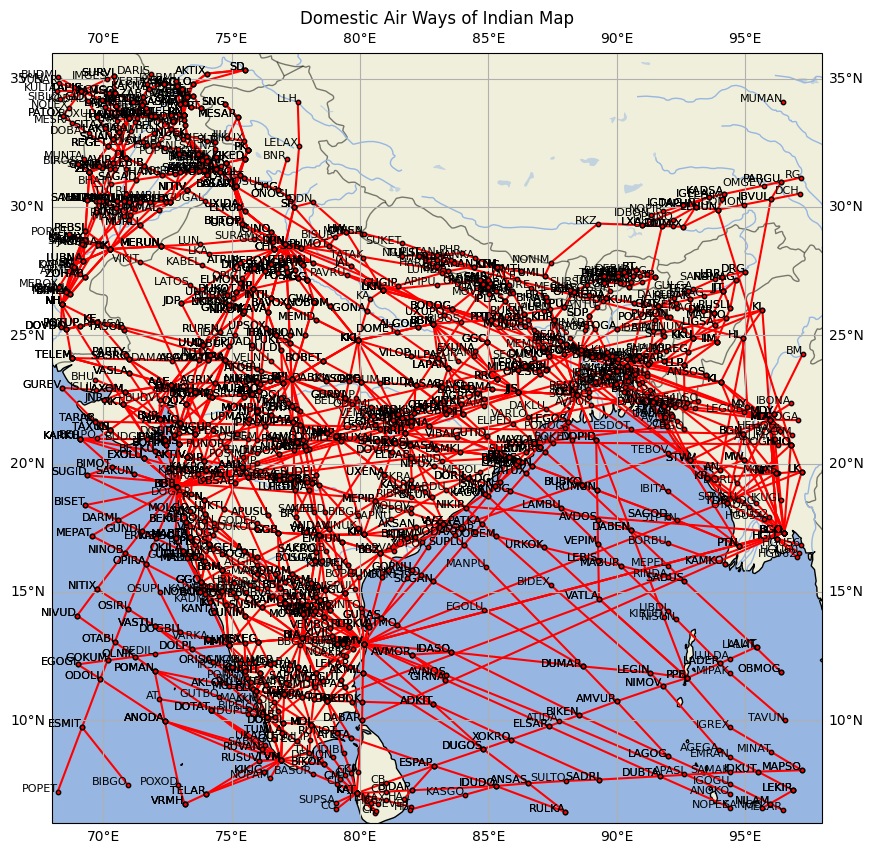

In [155]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Create a figure and an axes object with the specified projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add Indian boundaries and states
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_extent([68, 98, 6, 36], crs=ccrs.PlateCarree())

# Scatter plot on the map with labels
# Example latitude and longitude data
for route in i.index.unique().values:
    try:
        latitudes = i.loc[route]['latitude'].values
        longitudes = i.loc[route]['longitude'].values
        names = i.loc[route]['navaid'].values
    except:
        latitudes = [i.loc[route]['latitude']]
        longitudes = [i.loc[route]['longitude']]
        names = [i.loc[route]['navaid']]
    
    ax.scatter(longitudes, latitudes, color='red', s=10, edgecolor='k', zorder=5)
    ax.plot(longitudes, latitudes, color='red')
    
    for lon, lat, name in zip(longitudes, latitudes, names):
        ax.text(lon, lat, name, fontsize=8, ha='right', transform=ccrs.PlateCarree())

# Add gridlines for better readability
ax.gridlines(draw_labels=True)

# Add title
plt.title('Domestic Air Ways of Indian Map')
plt.savefig("DomesticAirWays.png")
# Show the plot
plt.show()


In [222]:
df = i 

In [167]:
len(navigationalId_map)

980

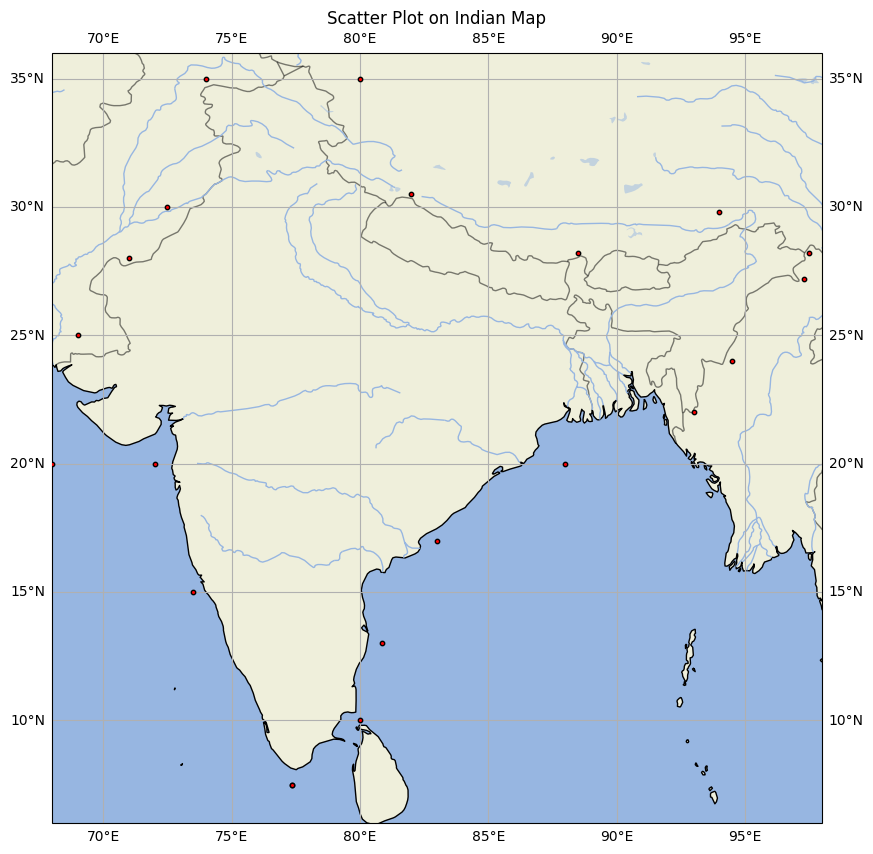

In [214]:
# filter out data only inside india using polygon 

india_border_coordinates = [
    (7.5, 77.35) , 
    (10 , 80) ,
    (13,80.85) ,
    (17 ,83) , 
    (20,88) , 
    (22 ,93) ,
    (24 ,94.5 ) ,
    (27.2,97.3) ,
    (28.2 , 97.5) , 
    (29.8 , 94) , 
    (28.2 , 88.5),
    (30.5 , 82) , 
    (35 ,80 ) ,
    (35,74) , 
    (30 ,72.5) , 
    (28,71),
    (25 ,69) , 
    (20 , 68) , 
    (20 ,72) , 
    (15 ,73.5) ,
    (7.5, 77.35) , 
]
df = pd.DataFrame(india_border_coordinates , columns=['latitude' ,'longitude'])

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Example latitude and longitude data
latitudes = df['latitude'].values
longitudes = df['longitude'].values

# Create a figure and an axes object with the specified projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add Indian boundaries and states
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_extent([68, 98, 6, 36], crs=ccrs.PlateCarree())

# Scatter plot on the map
ax.scatter(longitudes, latitudes, color='red', s=10, edgecolor='k', zorder=5)
# Add gridlines for better readability
ax.gridlines(draw_labels=True)

# Add title
plt.title('Scatter Plot on Indian Map')

# Show the plot
plt.show()


In [219]:
from shapely.geometry import Point, Polygon

india_polygon = Polygon(india_border_coordinates)

# Create a function to check if a point is within the polygon
def is_within_india(lat, lon, polygon):
    point = Point(lon, lat)
    return polygon.contains(point)


In [229]:
india_polygon.contains(Point(26,80))

True

In [231]:
df['within_india'] = df.apply(lambda row: is_within_india(row['longitude'], row['latitude'], india_polygon), axis=1)
df_in_india = df[df['within_india']].drop(columns='within_india')

In [234]:
df_in_india.navaid.nunique()

644

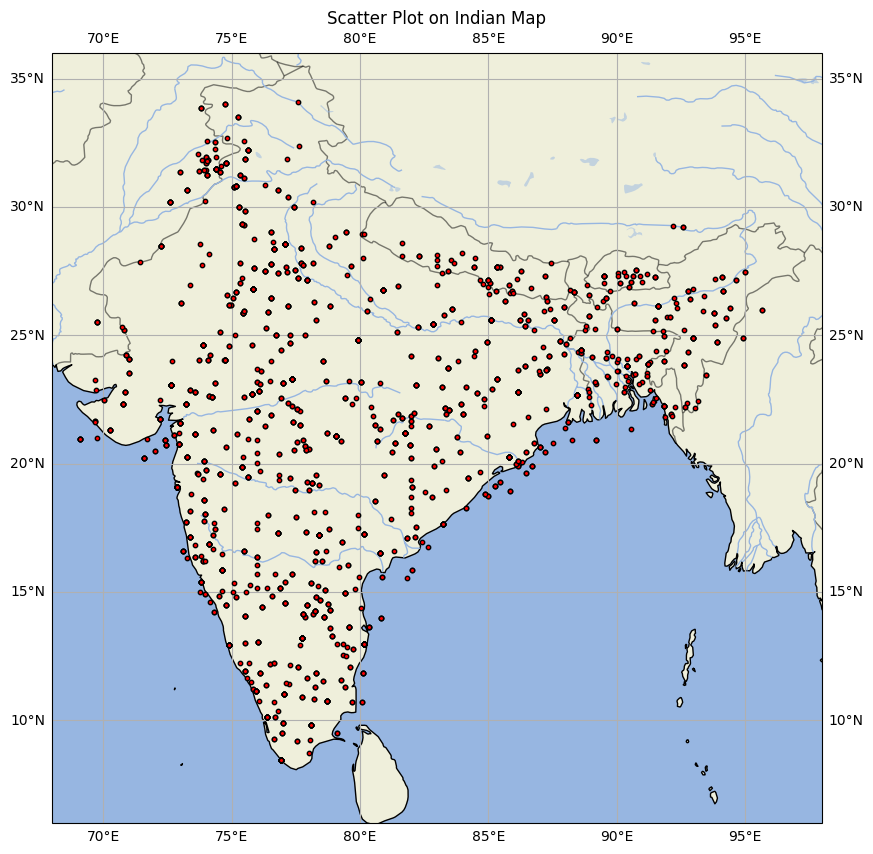

In [235]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Example latitude and longitude data
latitudes = df_in_india['latitude'].values
longitudes = df_in_india['longitude'].values

# Create a figure and an axes object with the specified projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add Indian boundaries and states
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_extent([68, 98, 6, 36], crs=ccrs.PlateCarree())

# Scatter plot on the map
ax.scatter(longitudes, latitudes, color='red', s=10, edgecolor='k', zorder=5)
# Add gridlines for better readability
ax.gridlines(draw_labels=True)

# Add title
plt.title('Scatter Plot on Indian Map')

# Show the plot
plt.show()


In [241]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

silhouette = []
inertia = []
for cluster in range(2,600):
    model = KMeans(n_clusters=cluster)
    y = model.fit_predict(df_in_india[['latitude','longitude']])
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(df_in_india[['latitude','longitude']] , y))



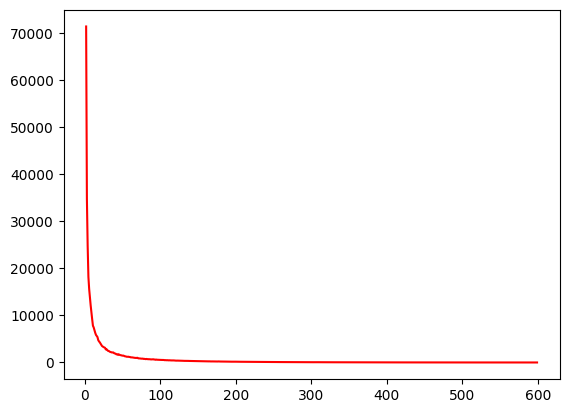

In [242]:
plt.plot(np.arange(2,600) , inertia , color='red')


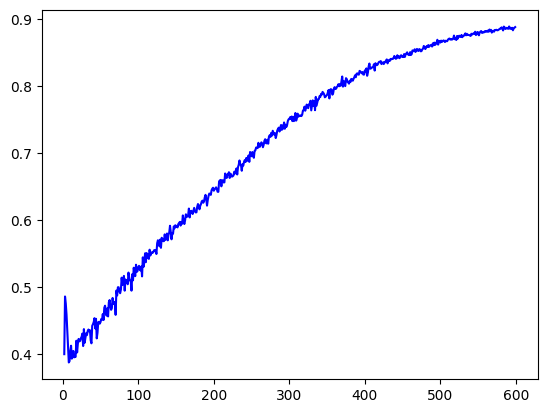

In [243]:
plt.plot(np.arange(2,600) , silhouette , color='blue')


In [244]:
model= KMeans(n_clusters=400)
y = model.fit_predict(df_in_india[['latitude','longitude']])


In [249]:
df_in_india['node'] = y

In [251]:
df_in_india.columns

Index(['id', 'navaid', 'latitude', 'longitude', 'has_one_occurrence', 'node'], dtype='object')

In [252]:
centroids = df_in_india.groupby('node').agg({'latitude': 'mean', 'longitude': 'mean'}).reset_index()

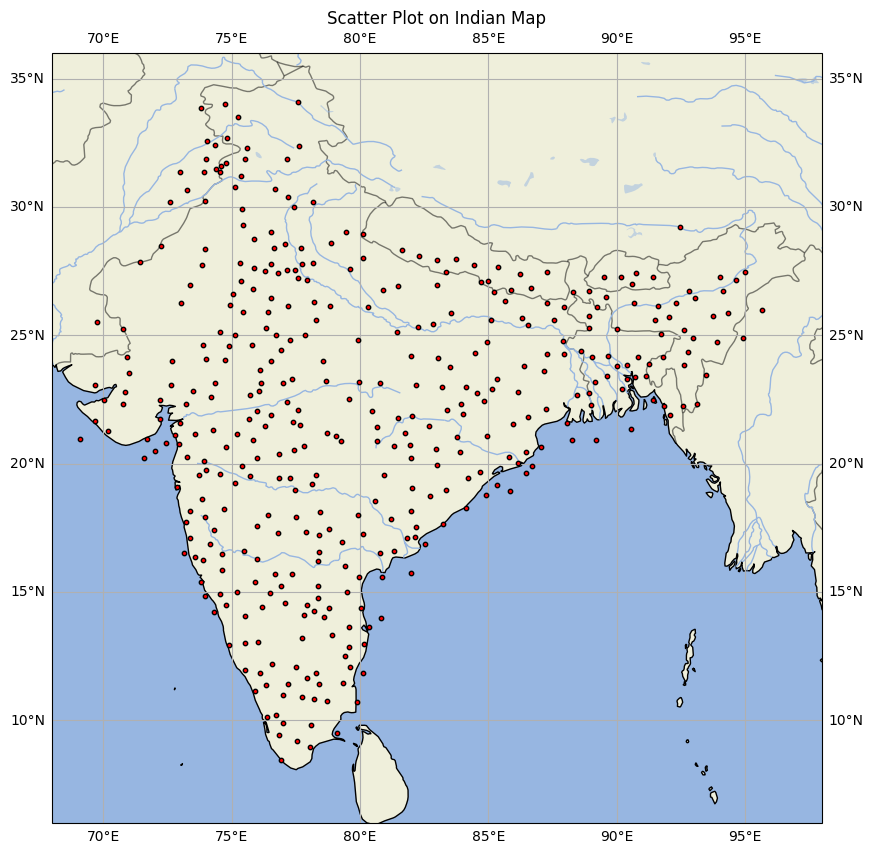

In [254]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Example latitude and longitude data
latitudes = centroids['latitude'].values
longitudes = centroids['longitude'].values

# Create a figure and an axes object with the specified projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add Indian boundaries and states
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_extent([68, 98, 6, 36], crs=ccrs.PlateCarree())

# Scatter plot on the map
ax.scatter(longitudes, latitudes, color='red', s=10, edgecolor='k', zorder=5)
# Add gridlines for better readability
ax.gridlines(draw_labels=True)

# Add title
plt.title('Scatter Plot on Indian Map')

# Show the plot
plt.show()


In [255]:
df_in_india['node_lat'] = df_in_india

,node,latitude,longitude
0,0,24.410946,88.600222
1,1,19.446944,77.259167
2,2,27.539167,77.466667
3,3,13.194591,77.729756
4,4,24.612842,73.894111
...,...,...,...
395,395,22.770833,88.927037
396,396,23.393264,90.727014
397,397,19.622222,86.458333
398,398,20.940403,75.816806


In [258]:
centroids = centroids.rename(columns={'latitude': 'node_lat', 'longitude': 'node_long'})
route_data = pd.merge(df_in_india , centroids , on='node')

In [261]:
route_data.index = df_in_india.index
route_data = route_data.drop(['id'],axis=1)
route_data

,navaid,latitude,longitude,has_one_occurrence,node,node_lat,node_long
route,,,,,,,
A201,LKN,26.758556,80.894417,False,43,26.758556,80.894417
A201,BODOG,26.026944,83.581944,False,175,25.886984,83.544722
A201,PPT,25.590417,85.089917,False,123,25.590417,85.089917
A201,MONDA,25.350556,86.437778,False,255,25.405834,86.530602
A201,BIKIK,24.779722,87.797500,False,155,24.769524,87.919802
...,...,...,...,...,...,...,...
Z303,LA,31.499722,74.400019,False,362,31.499722,74.400019
Z305,LA,31.499722,74.400019,False,362,31.499722,74.400019
Z305,ADNIM,31.813333,74.047778,True,7,31.862331,74.015913


In [272]:
routes_to_drop = [] # drop routes with only one id and no intersection 
for route in route_data.index.unique().values : 
    if isinstance(route_data.loc[route] , pd.Series) : 
        routes_to_drop.append(route)
print(routes_to_drop)

['B459', 'G202', 'J149', 'J150', 'J151', 'L750', 'L896', 'L899', 'M641', 'N564', 'N640', 'P518', 'P570', 'P751', 'P761', 'R471', 'T4', 'T6', 'T7', 'T8', 'UL425', 'V2', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V3', 'V6', 'V8', 'W145', 'W526']


In [275]:
route_data = route_data.drop(index=routes_to_drop)

In [276]:
route_data

,navaid,latitude,longitude,has_one_occurrence,node,node_lat,node_long
route,,,,,,,
A201,LKN,26.758556,80.894417,False,43,26.758556,80.894417
A201,BODOG,26.026944,83.581944,False,175,25.886984,83.544722
A201,PPT,25.590417,85.089917,False,123,25.590417,85.089917
A201,MONDA,25.350556,86.437778,False,255,25.405834,86.530602
A201,BIKIK,24.779722,87.797500,False,155,24.769524,87.919802
...,...,...,...,...,...,...,...
Z303,LA,31.499722,74.400019,False,362,31.499722,74.400019
Z305,LA,31.499722,74.400019,False,362,31.499722,74.400019
Z305,ADNIM,31.813333,74.047778,True,7,31.862331,74.015913


In [277]:
edge_list = []

for route in route_data.index.unique().values:
    edge = [] 
    
    for node in route_data.loc[route].iterrows():
        edge.append(node[1].node)
        # print(edge)
        if len(edge) == 2 :
            edge_list.append(edge.copy())
            del edge[0]
print(f'Number of edges in graph : {len(edge_list)}')

Number of edges in graph : 1495


In [278]:
route_data.to_csv("final_domestic_routes.csv")